# Predicting Purchase Intent with Supervised Learning

## Project Overview

This project analyzes website data to predict purchase intent. The performance of three machine learning models is compared to address this classification problem:
- Logistic Regression
- Random Forest
- Support Vector Machine

Predicting purchase intent has significant positive implications for businesses. Understanding the features that influence online shopping conversion can help companies:
- Optimize the conversion funnel
- Improve marketing ROI
- More accurately forecast revenue

GitHub Repository: [https://github.com/mark-shore/purchase-intent](https://github.com/mark-shore/purchase-intent)

## Data Overview

The dataset includes 12,330 sessions, 17 features, and 1 target.

| Variable | Description| Type|
|:---------|:------------------------------------------|-----------|
| Administrative | # of Administrative pages visited| Integer|
| Administrative_Duration | Time spent on Administrative pages| Float|
| Informational | # of Informational pages visited| Integer|
| Informational_Duration | Time spent on Informational pages| Float|
| ProductRelated | # of ProductRelated pages visited| Integer|
| ProductRelated_Duration | Time spent on ProductRelated pages| Float|
| BounceRates | % of visitors who enter the site from that page and then exit the site| Float|
| ExitRates | % of visitors to the page from which they exit the site| Float|
| PageValues | Average value for a page that a user visited before converting| Float|
| SpecialDay | How close the visit was to a special day (Mother's Day, Valentine's Day, etc.)| Float|
| Month| Month of the visit| Categorical|
| OperatingSystems | User's operating system| Integer (Encoded Categorical)|
| Browser | User's browser| Integer (Encoded Categorical)|
| Region | User's region| Integer (Encoded Categorical)|
| TrafficType | How the user found the site| Integer (Encoded Categorical)|
| VisitorType | New or returning user| Categorical|
| Weekend | Whether the visit was during the weekend| Boolean|
| Revenue | **Target** - Whether the user converted| Boolean|


Sakar, C. & Kastro, Y. (2018). *Online Shoppers Purchasing Intention Dataset* [Data set]. UCI Machine Learning Repository. Retrieved from [https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

In [1]:
# Importing all the required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, f1_score

In [2]:
# Load the csv file using Pandas
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Get a high-level understanding of the data
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data Cleaning

### Data Cleaning Overview

The DataFrame is first examined to gain a high-level understanding of the data types and structure. This initial exploration helps identify potential issues, such as missing values or poorly-structured data.

In [4]:
# View the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Check for any missing data
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Data Transformation
Next, all non-numerical data is analyzed to determine whether any should be transformed or dropped. Numerical data is preferable for the machine learning models.

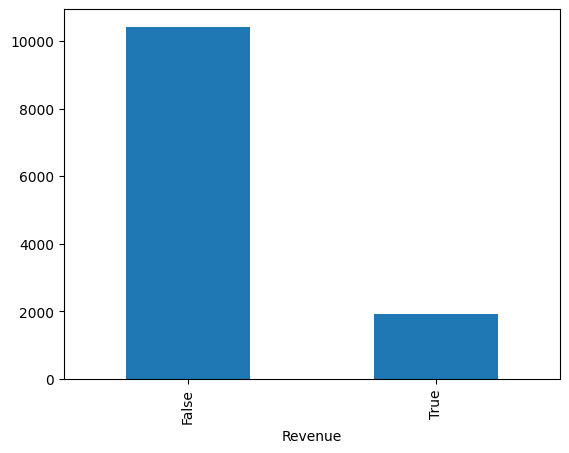

In [6]:
# Understand the data distribution for the target 'Revenue'
df['Revenue'].value_counts().plot(kind='bar')
plt.show()

In [7]:
# Convert boolean target 'Revenue' to binary
df['Revenue'] = df['Revenue'].astype(int)

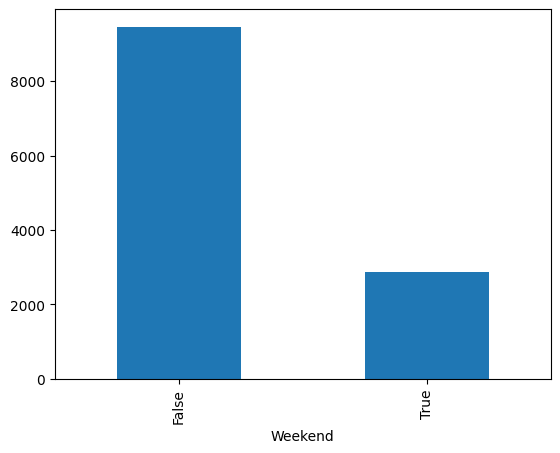

In [8]:
# Understand the data distribution for the 'Weekend' feature
df['Weekend'].value_counts().plot(kind='bar')
plt.show()

In [9]:
# Convert boolean feature 'Weekend' to binary
df['Weekend'] = df['Weekend'].astype(int)

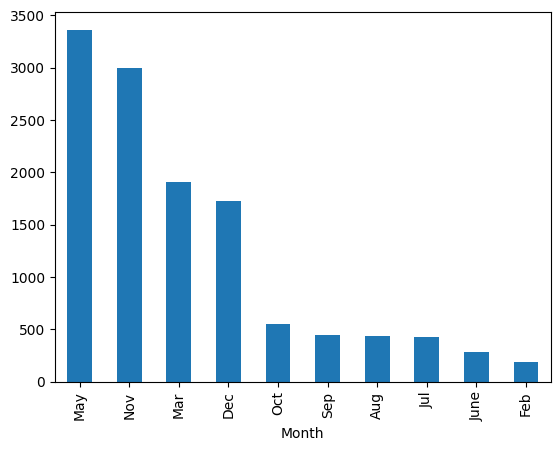

In [10]:
# Understand the data distribution for the 'Month' feature
df['Month'].value_counts().plot(kind='bar')
plt.show()

In [11]:
# Convert object feature 'Month' to numerical data
month_dict = {
    'Feb': 2,
    'Mar': 3,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

df['Month'] = df['Month'].map(month_dict)

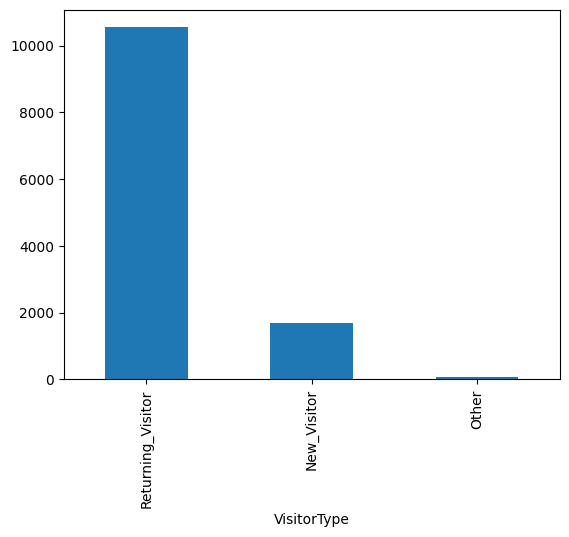

In [12]:
# Understand the data distribution for the 'VisitorType' feature
df['VisitorType'].value_counts().plot(kind='bar')
plt.show()

In [13]:
# Calculate percentage of 'VisitorType' == 'Other'
other_count = (df['VisitorType'] == 'Other').sum()
percent_other = other_count / len(df) * 100
print(f"Percentage of 'Other' VisitorType: {percent_other:.2f}%")

Percentage of 'Other' VisitorType: 0.69%


In [14]:
# Remove all data with 'VisitorType' == 'Other' in order to simplify data and convert column to a binary value
df = df[df['VisitorType'] != 'Other']

In [15]:
# Create a new 'NewVisitor' column, which will be a binary column based on 'VisitorType'
df['NewVisitor'] = df['VisitorType'].map({'New_Visitor': 1, 'Returning_Visitor': 0})

In [16]:
# Drop original 'VisitorType' column from dataframe
df = df.drop('VisitorType', axis=1)

### Data Cleaning Summary

The data was relatively clean and did not have any missing values. The 'Month', 'Weekend', and 'Revenue' columns were converted to encoded categorical data.

All 'Other' data was dropped from the 'VisitorType' column since visitors are generally classified in a binary way (New or Returning), and 'Other' represented only 0.69% of data. After dropping this category, a new 'NewVisitor' column was created, which contains encoded categorical data.

The data now contains only numerical or encoded categorical data and is ready for exploratory data analysis (EDA).

In [17]:
# View updated columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12245 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12245 non-null  int64  
 1   Administrative_Duration  12245 non-null  float64
 2   Informational            12245 non-null  int64  
 3   Informational_Duration   12245 non-null  float64
 4   ProductRelated           12245 non-null  int64  
 5   ProductRelated_Duration  12245 non-null  float64
 6   BounceRates              12245 non-null  float64
 7   ExitRates                12245 non-null  float64
 8   PageValues               12245 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  Month                    12245 non-null  int64  
 11  OperatingSystems         12245 non-null  int64  
 12  Browser                  12245 non-null  int64  
 13  Region                   12245 non-null  int64  
 14  TrafficType              12

## Exploratory Data Analysis

### Correlation Matrix

The correlation matrix is analyzed to identify features that are highly correlated with the target 'Revenue' and to detect potentially collinear features.

In [18]:
# Change order of columns to relocate target 'Revenue' to index 0
columns = ['Revenue'] + [col for col in df.columns if col != 'Revenue']
df = df[columns]

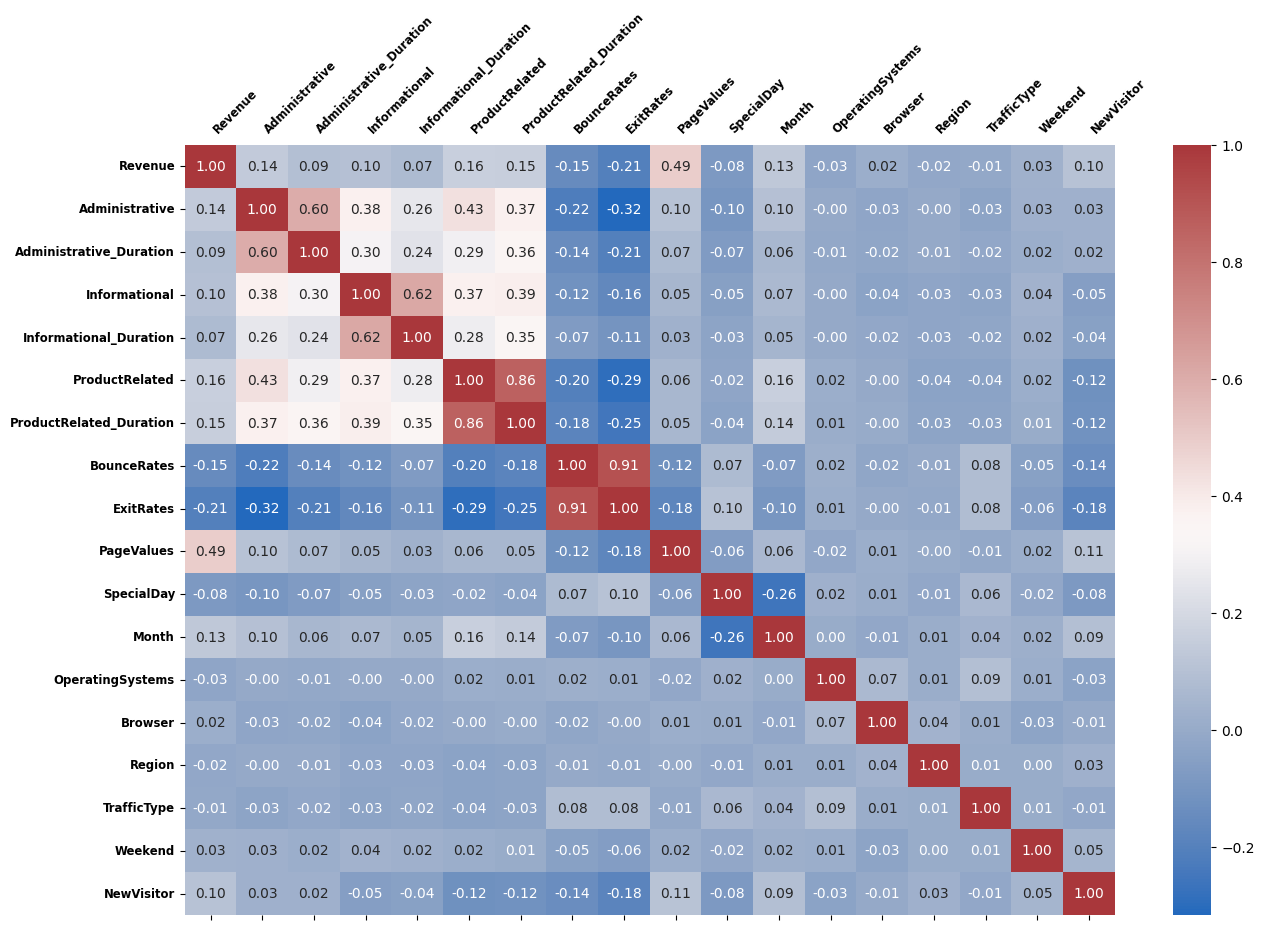

In [19]:
# Plot correlation matrix
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='vlag', fmt=".2f")
column_labels = [column.get_text() for column in heatmap.get_xticklabels()]
row_labels = [row.get_text() for row in heatmap.get_yticklabels()]
heatmap.set_xticklabels(column_labels, ha='left', rotation=45, fontsize='small', fontweight='bold')
heatmap.set_yticklabels(row_labels, fontsize='small', fontweight='bold')
heatmap.tick_params(labeltop=True, labelbottom=False)
plt.show()

There are several features with a significant correlation with the target 'Revenue'. 'PageValues' stands out as having an especially high correlation, which is logical since it quantifies the value of the pages a user has visited.

Some features are highly correlated with each other, suggesting possible collinearity. To investigate these relationships further, a pairwise plot is analyzed for features with a correlation score of 0.6 or higher.

### Pairwise Plot

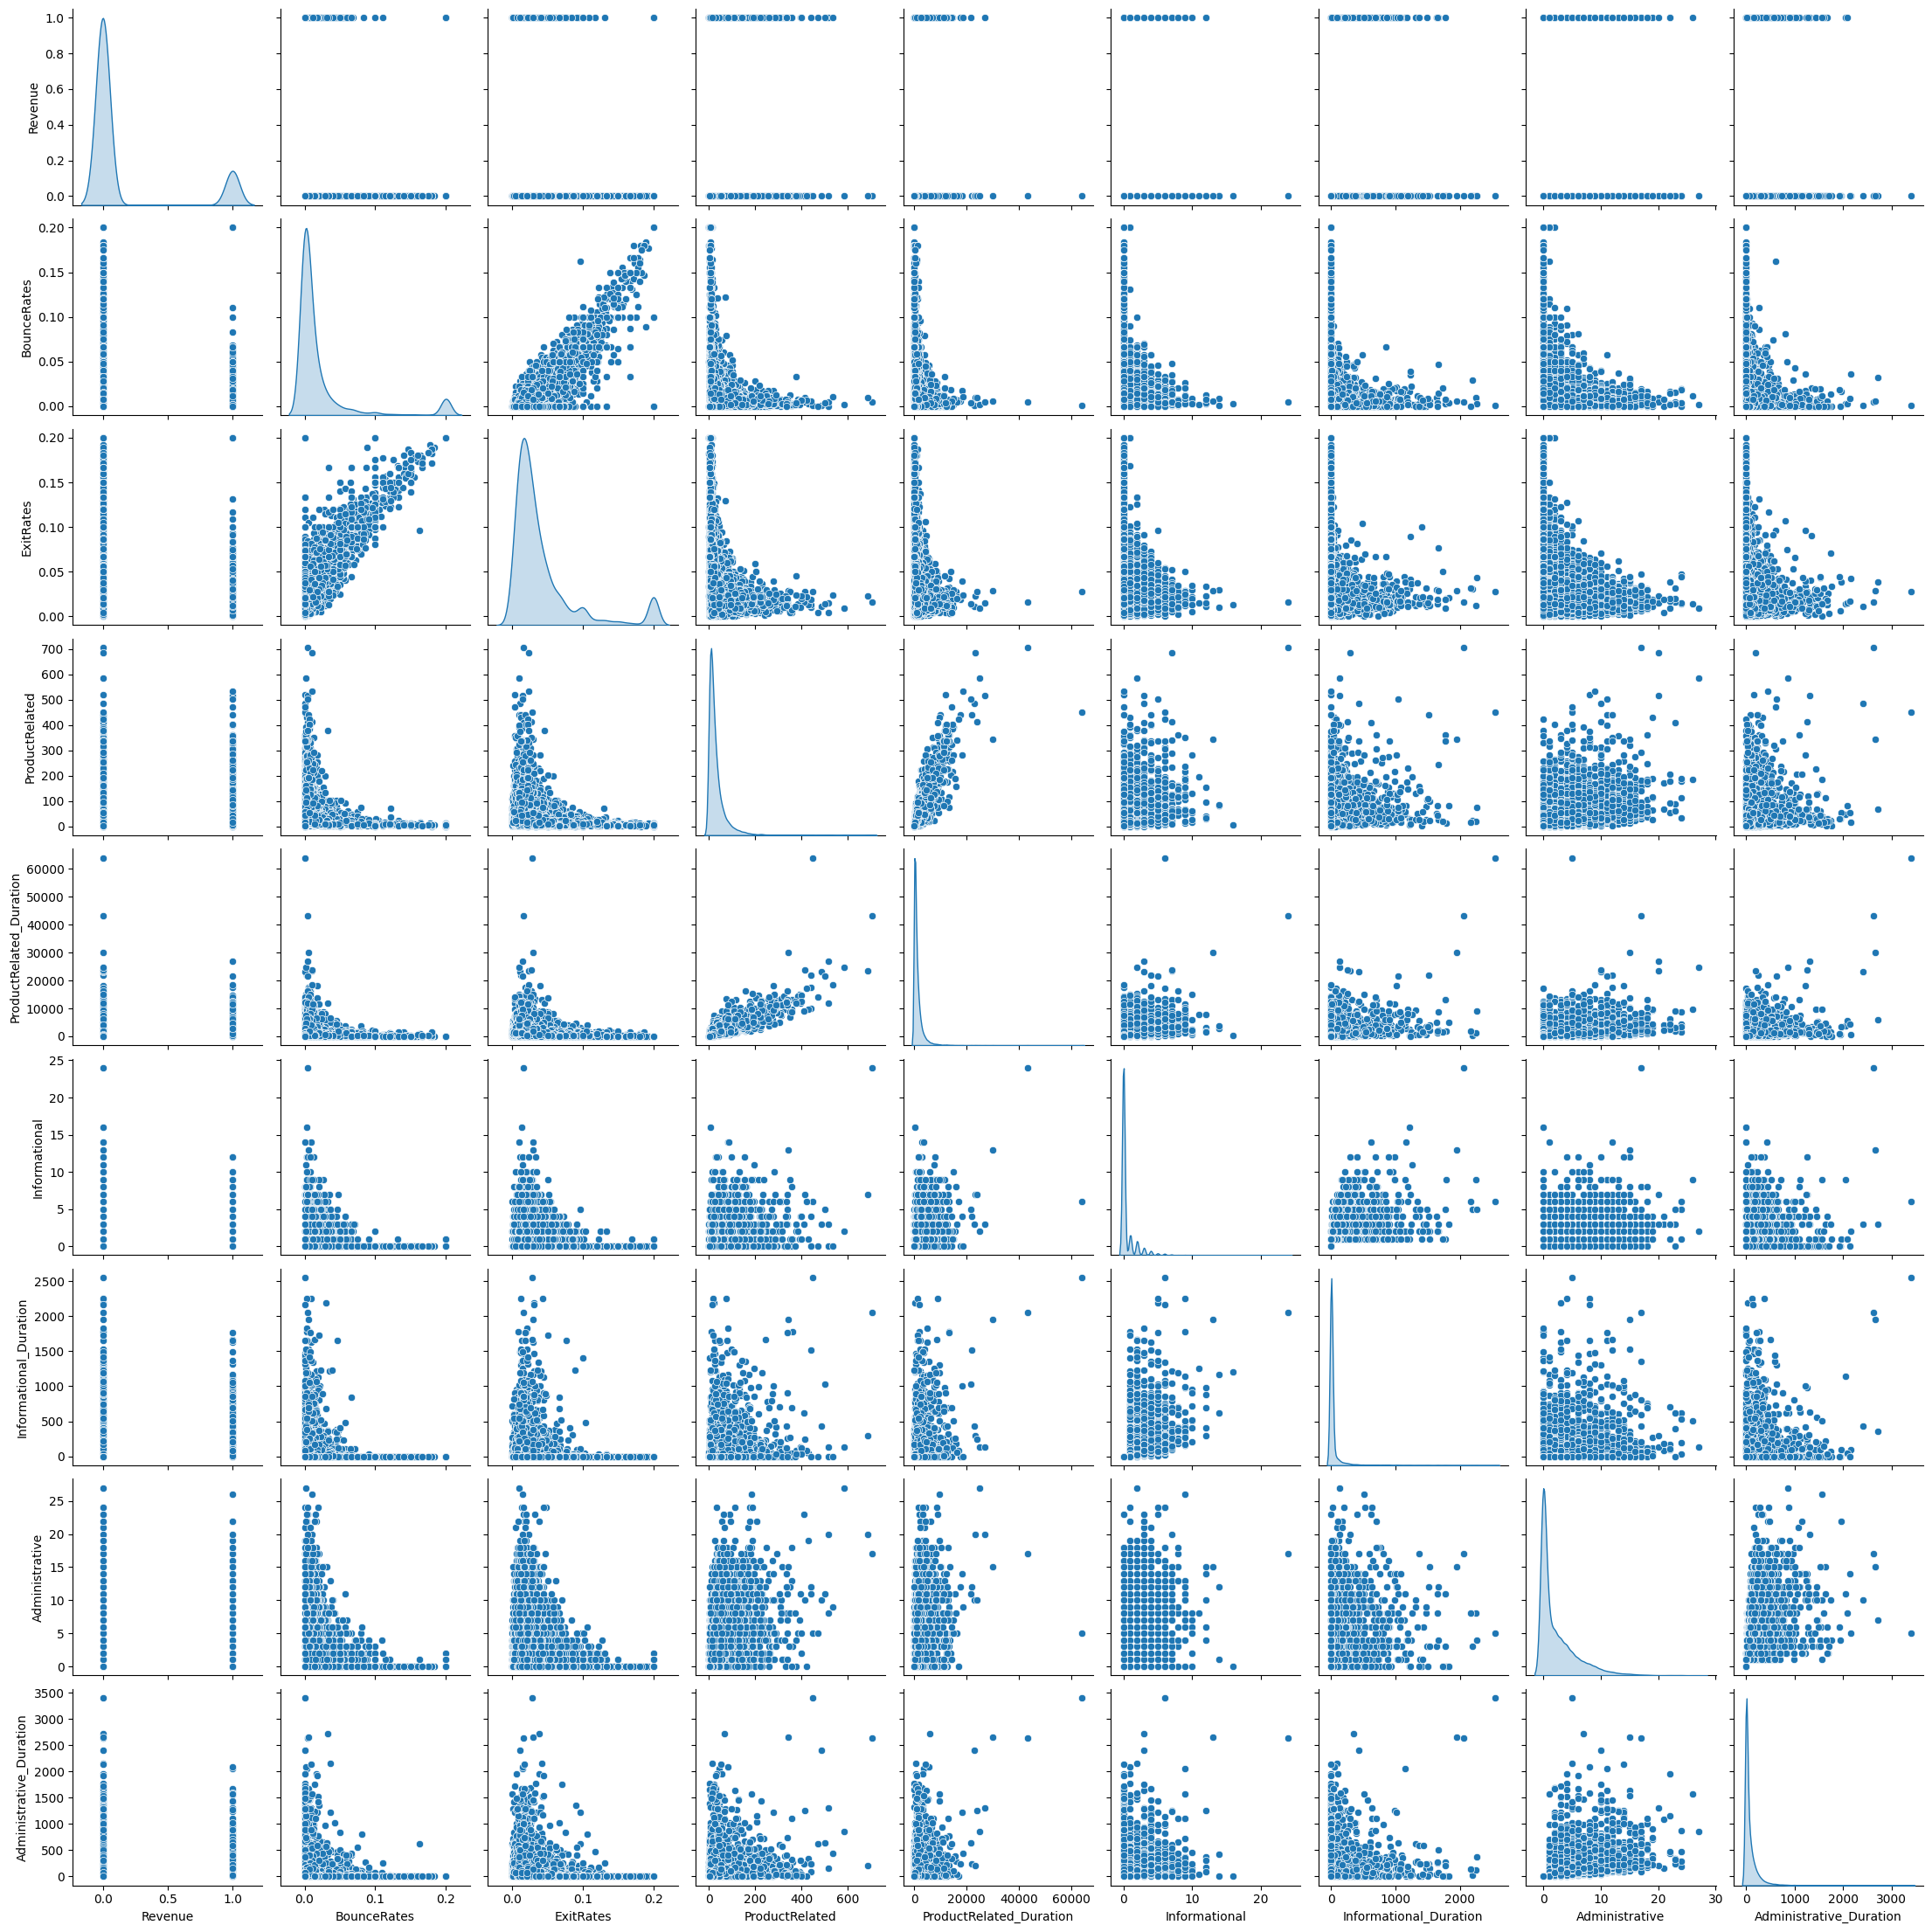

In [20]:
# Plot pairwise relationships of highly correlated features 
sns.pairplot(df[['Revenue', 'BounceRates', 'ExitRates', 'ProductRelated', 'ProductRelated_Duration',
                   'Informational', 'Informational_Duration', 'Administrative', 'Administrative_Duration']], diag_kind='kde')
plt.show()

Observations indicate:
- A negative correlation between 'Revenue' and both 'BounceRates' and 'ExitRates'
- A positive correlation between 'Revenue' and the other features

As anticipated, there are strong positive correlations between:
- 'Administrative' and 'Administrative_Duration'
- 'Informational' and 'Informational_Duration'
- 'ProductRelated' and 'ProductRelated_Duration'
- 'BounceRates' and 'ExitRates'

Due to the similar nature of these highly correlated feature pairs and to address collinearity, one feature from each pair will be retained, and the other will be excluded from the analysis.

In [21]:
# Dropping 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', and 'BounceRates' from the dataset
df = df.drop(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates'], axis=1)

### Box Plots

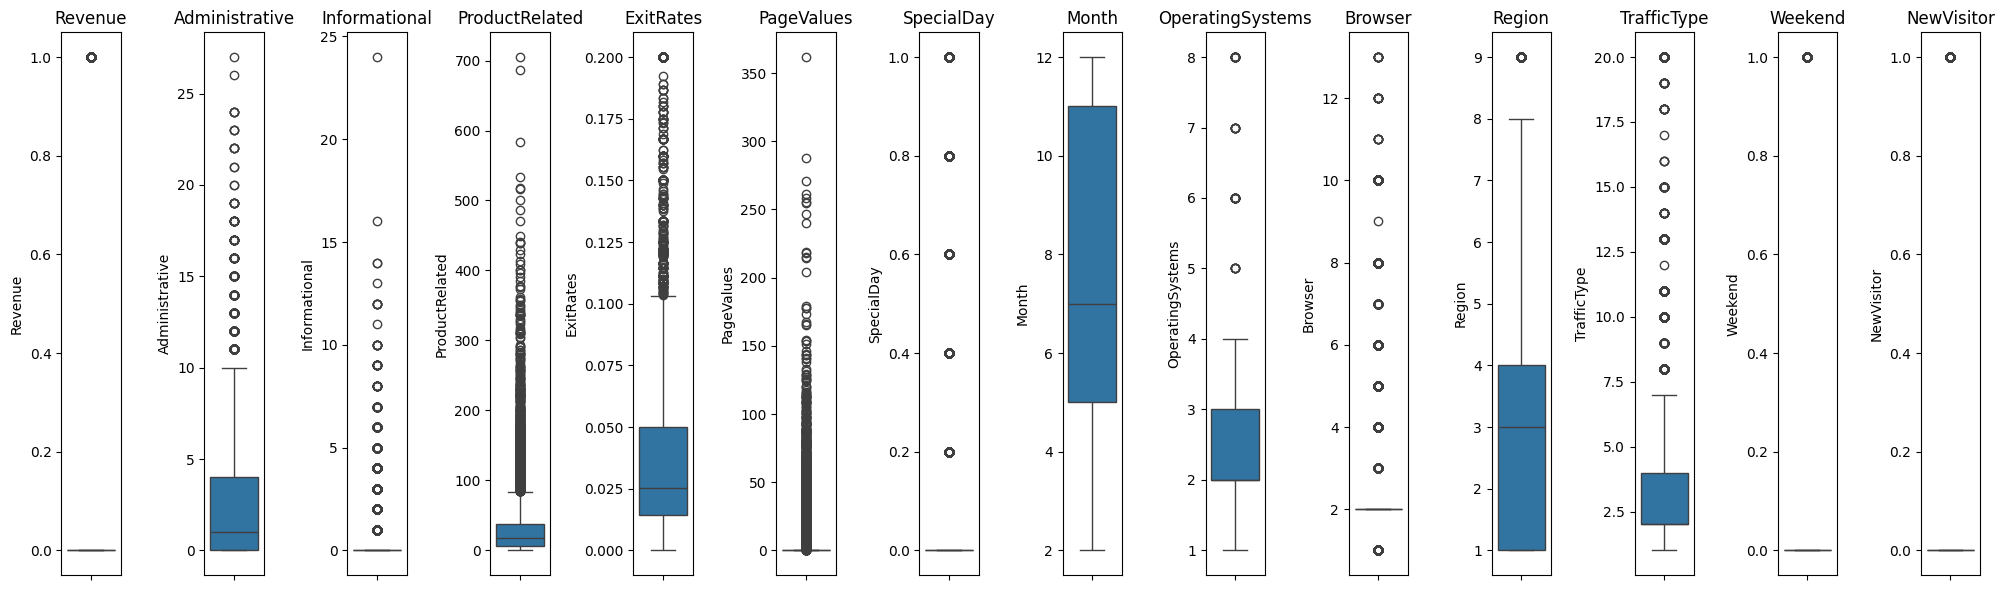

In [22]:
# Plot box plots for each variable
columns = df.columns
n = len(columns)
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(20,6))

for i, column in enumerate(columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

The box plots show that several features exhibit a wide range of values, which could potentially skew model performance. Data standardization will be incorporated before training the models to minimize this issue.

## Models
The data is standardized and then separated into training and test sets.

In [23]:
# Separate the data into features and labels
X = df.iloc[:, 1:]
y = df.iloc[:, :1]
y = y.values.ravel()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Print the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (9796, 13)
Testing features shape: (2449, 13)
Training labels shape: (9796,)
Testing labels shape: (2449,)


### Logistic Regression

Cross-validation is performed on hyperparameters 'C' and 'solver' before training the Logistic Regression model.

In [24]:
# Hyperparameter tuning for 'C' and 'solver'
C_values = [2 ** n for n in range(-5, 6)]
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
LogReg = LogisticRegression(random_state=12)
LogReg_grid = GridSearchCV(LogReg, param_grid={'C': C_values, 'solver': solvers})
LogReg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=12),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

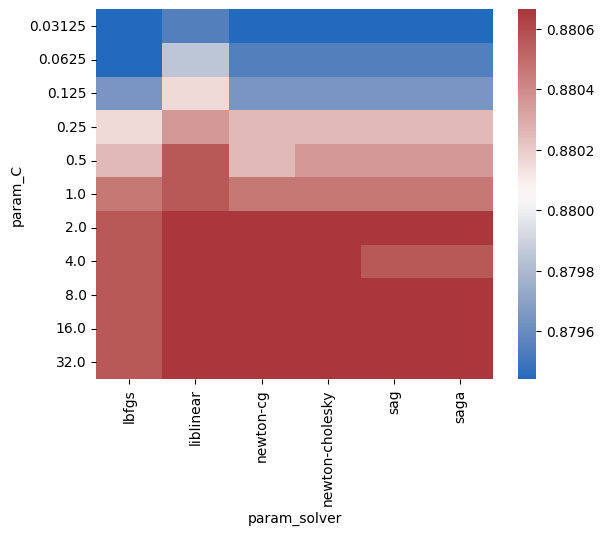

In [25]:
# Plot heatmap for hyperparameter tuning results
LogReg_results = pd.DataFrame(LogReg_grid.cv_results_)
pivot_table = LogReg_results.pivot(values='mean_test_score', index='param_C', columns='param_solver')
sns.heatmap(pivot_table, cmap='vlag')
plt.show()

In [26]:
# Print the best parameters and best score
print(LogReg_grid.best_params_)
print(LogReg_grid.best_score_)

{'C': 2, 'solver': 'liblinear'}
0.8806650623495953


In [27]:
# Fit the Logistic Regression model on the training data
LogReg = LogisticRegression(**LogReg_grid.best_params_, random_state=12)
start_time = time.time()
LogReg.fit(X_train, y_train)
LogReg_time = time.time() - start_time
print(f"Training time: {LogReg_time:.3f} seconds")

Training time: 0.013 seconds


In [28]:
# Predict the test data using the Logistic Regression model
LogReg_pred = LogReg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, LogReg_pred):.3f}")

Accuracy: 0.883


### Random Forest

Cross-validation is performed on hyperparameters 'n_estimators' and 'max_depth' before training the Random Forest model.

In [29]:
# Hyperparameter tuning for 'n_estimators' and 'max_depth'
n_estimators = [100, 200, 300]
max_depth = [None, 5, 10, 15, 20]
RF = RandomForestClassifier(random_state=12)
RF_grid = GridSearchCV(RF, param_grid={'n_estimators': n_estimators, 'max_depth': max_depth})
RF_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=12),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300]})

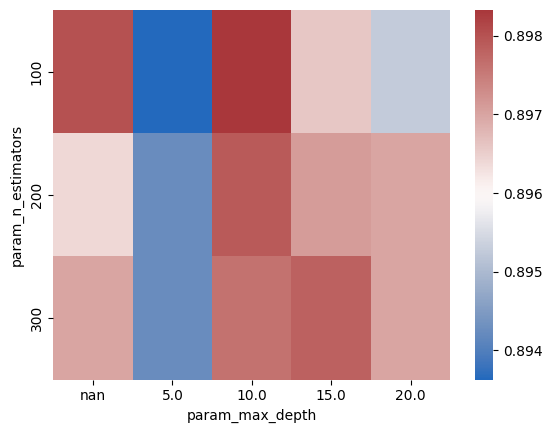

In [30]:
# Plot heatmap for hyperparameter tuning results
RF_results = pd.DataFrame(RF_grid.cv_results_)
pivot_table = RF_results.pivot(values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(pivot_table, cmap='vlag')
plt.show()

In [31]:
# Print the best parameters and best score
print(RF_grid.best_params_)
print(RF_grid.best_score_)

{'max_depth': 10, 'n_estimators': 100}
0.8983254159244096


In [32]:
# Fit the Random Forest model on the training data
RF = RandomForestClassifier(**RF_grid.best_params_, random_state=12)
start_time = time.time()
RF.fit(X_train, y_train)
RF_time = time.time() - start_time
print(f"Training time: {RF_time:.3f} seconds")

Training time: 0.433 seconds


In [33]:
# Predict the test data using the Random Forest model
RF_pred = RF.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, RF_pred):.3f}")

Accuracy: 0.906


### Support Vector Machine

Cross-validation is performed on hyperparameters 'C' and 'kernel' before training the Support Vector Machine model.

In [34]:
# Hyperparameter tuning for 'C' and 'kernel'
# NOTE - This cell takes a while to run
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
SVM = SVC(random_state=12)
SVM_grid = GridSearchCV(SVM, param_grid={'C': C_values, 'kernel': kernels})
SVM_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=12),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

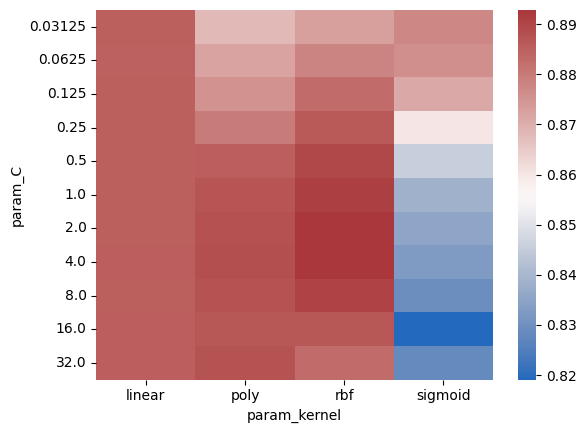

In [35]:
# Plot heatmap for hyperparameter tuning results
SVM_results = pd.DataFrame(SVM_grid.cv_results_)
pivot_table = SVM_results.pivot(values='mean_test_score', index='param_C', columns='param_kernel')
sns.heatmap(pivot_table, cmap='vlag')
plt.show()

In [36]:
# Print the best parameters and best score
print(SVM_grid.best_params_)
print(SVM_grid.best_score_)

{'C': 4, 'kernel': 'rbf'}
0.8928130762258961


In [37]:
# Fit the Support Vector Machine model on the training data
SVM = SVC(**SVM_grid.best_params_, probability=True, random_state=12)
start_time = time.time()
SVM.fit(X_train, y_train)
SVM_time = time.time() - start_time
print(f"Training time: {SVM_time:.3f} seconds")

Training time: 7.309 seconds


In [38]:
# Predict the test data using the Support Vector Machine model
SVM_pred = SVM.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, SVM_pred):.3f}")

Accuracy: 0.897


## Results and Analysis

### ROC Curves
First, the ROC curves are analyzed to determine the model with the highest recall.

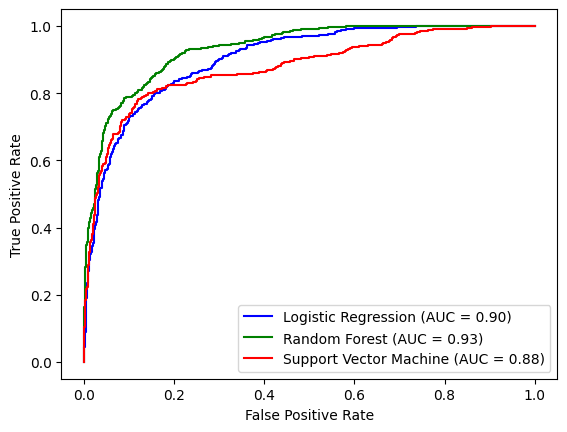

In [39]:
# Calculate predicted probabilities for each model
LogReg_prob = LogReg.predict_proba(X_test)[:, 1]
RF_prob = RF.predict_proba(X_test)[:, 1]
SVM_prob = SVM.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
LogReg_fpr, LogReg_tpr, LogReg_thresholds = roc_curve(y_test, LogReg_prob)
LogReg_auc = auc(LogReg_fpr, LogReg_tpr)

RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_prob)
RF_auc = auc(RF_fpr, RF_tpr)

SVM_fpr, SVM_tpr, SVM_thresholds = roc_curve(y_test, SVM_prob)
SVM_auc = auc(SVM_fpr, SVM_tpr)

# Plot the ROC curves
plt.figure()
plt.plot(LogReg_fpr, LogReg_tpr, color='blue', label=f"Logistic Regression (AUC = {LogReg_auc:.2f})")
plt.plot(RF_fpr, RF_tpr, color='green', label=f"Random Forest (AUC = {RF_auc:.2f})")
plt.plot(SVM_fpr, SVM_tpr, color='red', label=f"Support Vector Machine (AUC = {SVM_auc:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

All models performed well, however the Random Forest model was the best with an AUC of 0.93.

### Confusion Matrices
Next, the confusion matrices are analyzed to identify the strengths and weaknesses of each model.

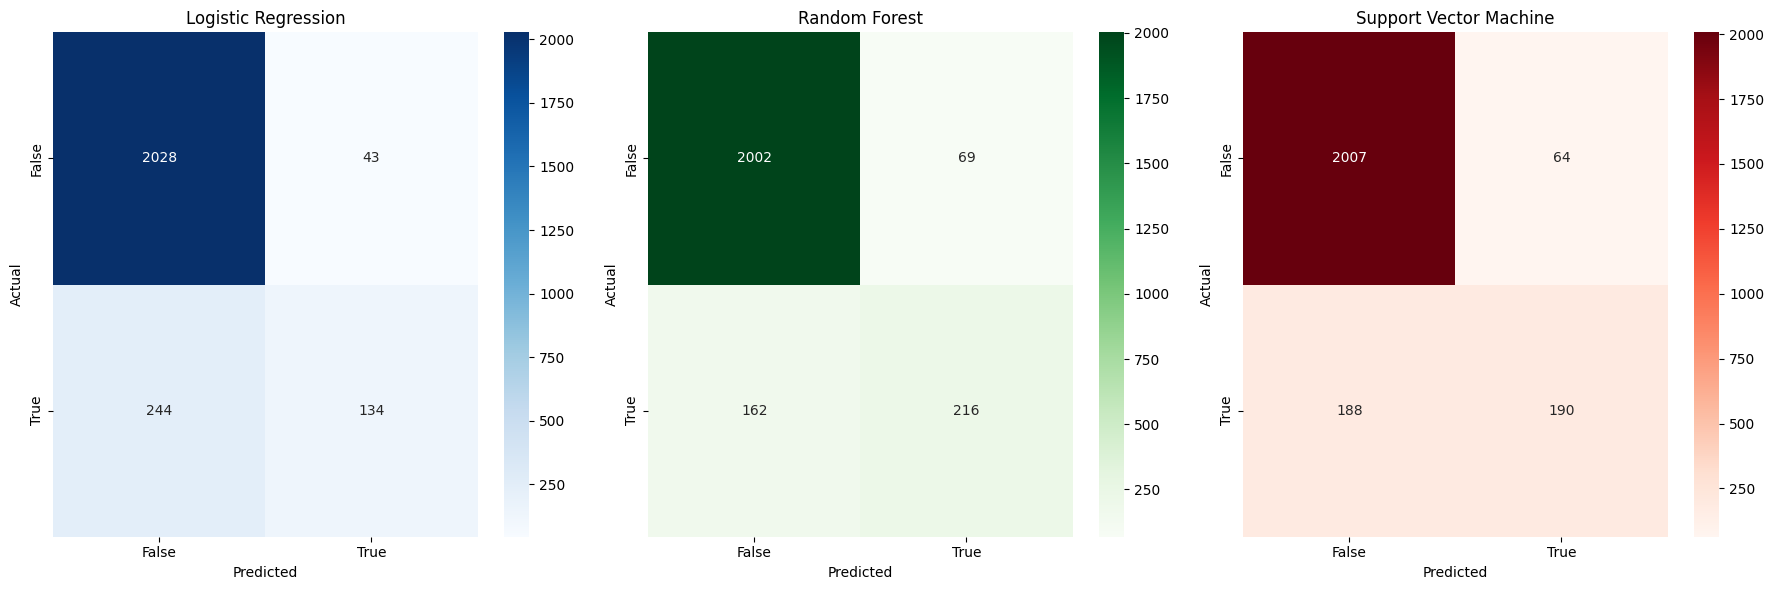

In [40]:
# Calculate Confusion Matrices for each model
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
RF_cm = confusion_matrix(y_test, RF_pred)
SVM_cm = confusion_matrix(y_test, SVM_pred)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

labels = ['False', 'True']

sns.heatmap(LogReg_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(RF_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(SVM_cm, annot=True, fmt='d', cmap='Reds', ax=axes[2], xticklabels=labels, yticklabels=labels)
axes[2].set_title('Support Vector Machine')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### True Negatives
All three models performed similarly well in identifying true negatives.

#### True Positives
The Random Forest model performed the best in identifying true positives.

#### False Negatives
The Logistic Regression model had significantly more false negatives.

#### False Positives
The Logistic Regression model had significantly fewer false positives.

### Performance Comparison
The models are then compared from an overall performance perspective.

In [41]:
# Calculate performance metrics for each model
results_table = {
    'Model': [],
    'Training Time (s)': [],
    'Accuracy': [],
    'Recall': [],
    'F1 Score': []
}

models = [
    ('Logistic Regression', LogReg_time, LogReg_pred),
    ('Random Forest', RF_time, RF_pred),
    ('Support Vector Machine', SVM_time, SVM_pred)
]

for model_name, training_time, y_pred in models:
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results_table['Model'].append(model_name)
    results_table['Training Time (s)'].append(training_time)
    results_table['Accuracy'].append(accuracy)
    results_table['Recall'].append(recall)
    results_table['F1 Score'].append(f1)

results_df = pd.DataFrame(results_table).round(3)

print(results_df)

                    Model  Training Time (s)  Accuracy  Recall  F1 Score
0     Logistic Regression              0.013     0.883   0.354     0.483
1           Random Forest              0.433     0.906   0.571     0.652
2  Support Vector Machine              7.309     0.897   0.503     0.601


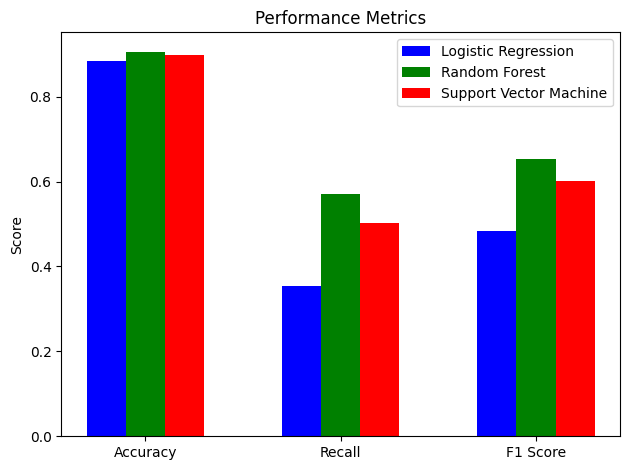

In [42]:
# Plot the performance metrics for each model
plot_data = results_df.melt(id_vars=['Model'], value_vars=['Accuracy', 'Recall', 'F1 Score'], var_name='Metric', value_name='Score')

bar_size = 0.2
colors = ['blue', 'green', 'red']

models = plot_data['Model'].unique()
metrics = plot_data['Metric'].unique()
r = [list(range(len(metrics)))]
for i in range(1, len(models)):
    r.append([x + bar_size for x in r[i-1]])

plt.figure()

for i, (model, color) in enumerate(zip(models, colors)):
    plt.bar(r[i], plot_data[plot_data['Model'] == model]['Score'], color=color, width=bar_size, label=model)

plt.xticks([x + bar_size for x in range(len(metrics))], metrics)
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()

There is a clear pattern for how the models ranked across all metrics:
1. Random Forest
2. Support Vector Machine
3. Logistic Regression

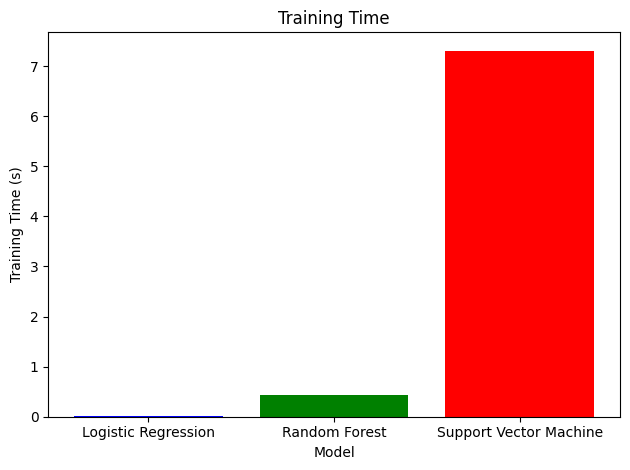

In [43]:
# Plot the training time for each model
plt.figure()

plt.bar(results_df['Model'], results_df['Training Time (s)'], color=colors)

plt.xlabel('Model')
plt.ylabel('Training Time (s)')
plt.title('Training Time')
plt.tight_layout()
plt.show()

The Logistic Regression model trained significantly faster than the others, while the Support Vector Machine model trained significantly slower.

### Feature Importance
Finally, the feature importance values for the Logistic Regression and Random Forest models are analyzed to discover learnings.

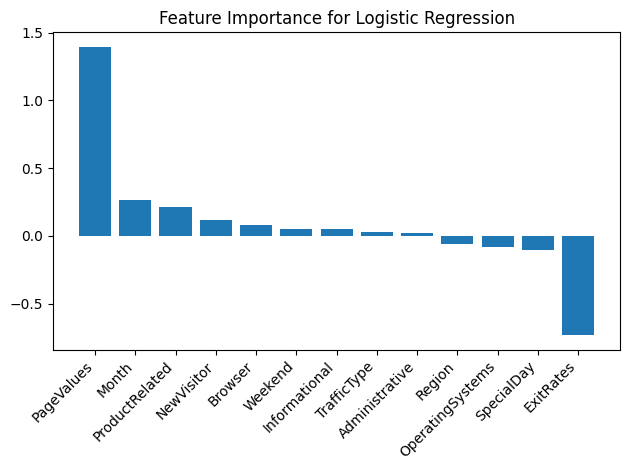

In [44]:
# Plot feature importance for Logistic Regression model
LogReg_importances = pd.DataFrame({
    'Feature': df.columns[1:],
    'Importance': LogReg.coef_[0]
}).sort_values(by='Importance', ascending=False)

plt.figure()
plt.bar(LogReg_importances['Feature'], LogReg_importances['Importance'])
plt.title('Feature Importance for Logistic Regression')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

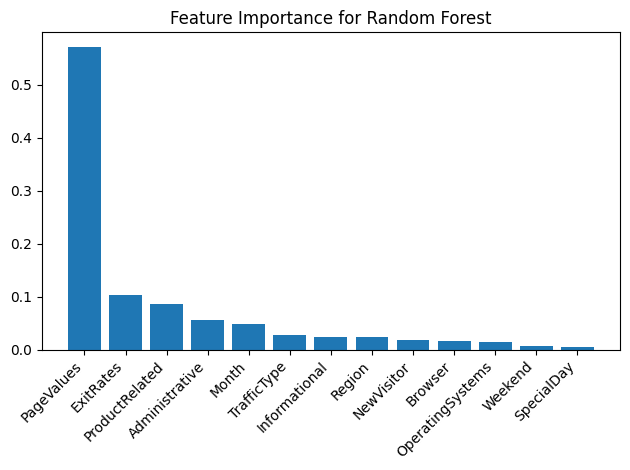

In [45]:
# Plot feature importance for Random Forest model
RF_importances = pd.DataFrame({
    'Feature': df.columns[1:],
    'Importance': RF.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure()
plt.bar(RF_importances['Feature'], RF_importances['Importance'])
plt.title('Feature Importance for Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

'PageValues' stands out as the most critical variable to optimize for, with 'ExitRates' and 'ProductRelated' also being important.

'SpecialDay' was surprisingly low on the importance scale and was even a negative indicator for the Logistic Regression model.

### Results Summary

The Logistic Regression, Random Forest, and Support Vector Machine models all performed well in predicting whether users will convert based on their website activity. Among these models, Random Forest demonstrated the highest overall performance, achieving the best accuracy, recall, and F1 score.

Given its relatively short training time of 0.46 seconds for 12,330 sessions, Random Forest is the most effective model for future predictions. Its high accuracy and efficient training time make Random Forest the recommended choice for similar datasets.

## Discussion and Conclusion

### Learning and Takeaways
The high accuracy of the models indicates that machine learning can reliably forecast user conversion, enabling more informed decision-making across departments. Deploying these models can also help optimize marketing strategies and resource allocation, improving ROI.

Some examples of immediate action items based on these learnings include:
- The marketing department can shift resources away from 'SpecialDay' campaigns to higher-performing campaigns
- The Conversion Rate Optimization (CRO) team can adjust the website to drive users to 'ProductRelated' pages and away from 'Informational' pages

### What Didn't Work Well

A LinearSVC model was attempted, but hyperparameter tuning proved to be considerably challenging since many combinations of parameters were not allowed. Despite several attempts, the model failed to converge and was ultimately abandoned.

### Areas for Improvement

While three high-performing models were trained, several others are worthwhile for future examination, including:
- LinearSVC
- Gradient Boosting
- XGBoost

Feature engineering could also be incorporated to improve the performance of existing models. Exploring new features and transforming existing ones could enhance model accuracy.